# **Caltech AI/ML Bootcamp**
## **Course 4: Deep Learning with Keras & TensorFlow**
### **Course End Project: Home Loan Data Analysis**

---

**Author**:  **Paul Badu Yakubu**

---

### **Project Overview**
In this project, we aim to build a deep learning model to predict the likelihood of loan defaults. Using historical data, we explore techniques such as data preprocessing, handling class imbalance, and implementing a robust neural network model with Keras and TensorFlow.

---

### **Key Objectives**
1. Analyze historical loan data for insights.
2. Handle imbalanced datasets using SMOTE.
3. Build and train a deep learning model to predict loan default probability.
4. Evaluate the model's performance with metrics like accuracy, sensitivity, and ROC-AUC.

---

### **Tools & Technologies**
- **Python**  
- **Pandas, NumPy**: Data manipulation and preprocessing  
- **Matplotlib, Seaborn**: Data visualization  
- **Scikit-learn**: Feature scaling and model evaluation  
- **TensorFlow, Keras**: Deep learning framework  
- **Imbalanced-learn (SMOTE)**: Balancing the dataset  

---

### **Project Structure**
1. **Data Loading & Exploration**  
   - Load the dataset and examine its structure.  
   - Identify and handle missing values.  

2. **Class Imbalance Handling**  
   - Use SMOTE to balance the dataset.  
   - Visualize the balanced dataset distribution.  

3. **Feature Encoding & Scaling**  
   - Encode categorical variables.  
   - Normalize features with MinMaxScaler.  

4. **Deep Learning Model**  
   - Create a neural network with Keras.  
   - Train the model and validate performance.  

5. **Evaluation & Results**  
   - Evaluate using confusion matrix and ROC-AUC curve.  
   - Visualize results and derive insights.  

---

### **End Goal**
To develop a predictive model that aids in identifying loan applicants with high default risks, ensuring a safer and more secure lending process.

---


## Import Necessary Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

# 1. Load Dataset

In [41]:
data = pd.read_csv("loan_data.csv")

In [42]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Check for null values

In [44]:
print(data.isnull().any().sum(),'Samples with missing values')

67 Samples with missing values


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [47]:
data = data.dropna()

In [48]:
data.isnull().sum().any()

False

# 3. Percentage of default and bar plot

In [49]:
default_percent = data['TARGET'].value_counts(normalize=True) * 100
print("Percentage of defaults:")
print(default_percent)

Percentage of defaults:
0    93.885143
1     6.114857
Name: TARGET, dtype: float64


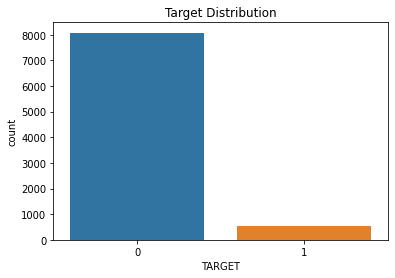

In [50]:
sns.countplot(data=data, x='TARGET')
plt.title('Target Distribution')
plt.show()

# 4. One-hot encoding of categorical variables

In [51]:
enc_data = pd.get_dummies(data, drop_first=True)

In [52]:
enc_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0,0,0,1,0,0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,1,0,0,0,0,0,1,0,0,0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,1,0,0,0,0,0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0,0,1,0,0,0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,-1105,...,0,0,0,0,0,0,0,1,0,0
307359,456084,0,1,99000.0,675000.0,21906.0,675000.0,0.020246,-14007,-2021,...,0,0,0,0,0,0,1,0,0,0
307407,456140,1,1,261000.0,711454.5,47673.0,643500.0,0.018850,-11407,-1641,...,0,0,0,0,0,0,1,0,0,0
307456,456195,0,0,94500.0,270000.0,15075.0,270000.0,0.028663,-20246,-5452,...,0,0,0,0,0,0,0,1,0,0


# 5. Balance the dataset using SMOTE

In [53]:
X = enc_data.drop(columns=['TARGET'])
y = enc_data['TARGET']

In [54]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 6. Plot balanced data

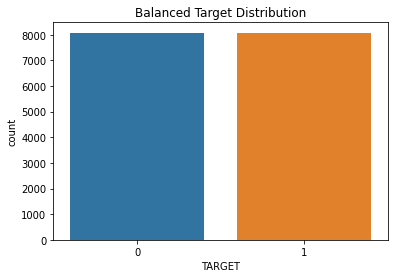

In [56]:
sns.countplot(x=y_resampled)
plt.title('Balanced Target Distribution')
plt.show()

# 7. Train-test split with a test size of 20%

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 8. Normalize the features

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Build the deep learning model

In [59]:
model = Sequential([
    Dense(80, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(80, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 10. Compile the model

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 11. Train the model

In [61]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
364/364 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.9124 - val_loss: 0.1524 - val_accuracy: 0.9567
Epoch 2/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.9545 - val_loss: 0.1373 - val_accuracy: 0.9590
Epoch 3/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9554 - val_loss: 0.1284 - val_accuracy: 0.9606
Epoch 4/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9596 - val_loss: 0.1245 - val_accuracy: 0.9629
Epoch 5/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.9598 - val_loss: 0.1437 - val_accuracy: 0.9551
Epoch 6/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9622 - val_loss: 0.1252 - val_accuracy: 0.9637
Epoch 7/50
364/364 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9624 - val_loss: 0.1265 - val_accuracy: 0.9598
Epoch 

# 12. Print model summary

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                17520     
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 24081 (94.07 KB)
Trainable params: 24081 (94.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 13. Evaluate on test set

In [63]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

101/101 [==============================] - 0s 664us/step - loss: 0.3615 - accuracy: 0.9526
Test Loss: 0.3614721894264221, Test Accuracy: 0.9526462554931641


# 14. Predictions and confusion matrix

In [64]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

101/101 [==============================] - 0s 614us/step
Confusion Matrix:
[[1559   57]
 [  96 1519]]


## 14.1 Plot confusion matrix
___

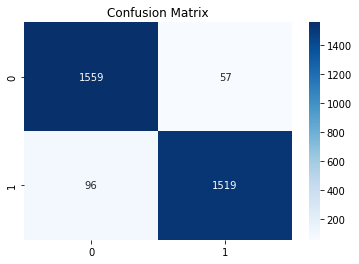

In [65]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 15. ROC-AUC curve

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

101/101 [==============================] - 0s 603us/step


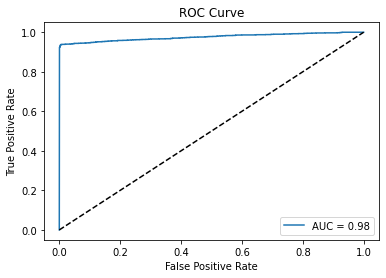

In [67]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# THANK YOU